# Spin Wave Simulation

Instrument: ARCS
* Ei=150meV
* Fermi chopper: ? Hz
* T0: 90Hz
 
Sample: SLAF tetragonal model
* lattice parameters: 5 5 5        90 90 90
* spin wave model available in paper: "Dynamical structure factor of quasi-two-dimensional antiferromagnet in high fields"
* Orientation: u,v = [1 0 2] and  [1 0 0]
* psi angles: -90, 90, step 3


## Step 0. some goodies

In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import histogram.hdf as hh, histogram as H

## Step 1. create dir structure

In [2]:
# Define which directory to use for my simulation
workdir = "/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/"

In [3]:
# change into primary simulation directory
%cd {workdir}
!ls

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2
samples  samples_3  scattering	scattering_2  scattering_3  scattering_4


In [4]:
!source ~lj7/.use-miniconda2
!source activate mcvine

discarding /SNS/users/lj7/software/miniconda2/envs/mcvine/bin from PATH
prepending /SNS/users/lj7/software/miniconda2/envs/mcvine/bin to PATH


## Step 2. obtain beam simulation

In [5]:
%cd {workdir}/scattering_4

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering_4


In [6]:
!ls -l

total 192
-rw-r--r-- 1 p63 users 168985 Jul 13 10:23 SLAF-tetragonal-model-v4.ipynb


## Step 3. Check/Update sample assembly

In [7]:
!cp -r {workdir}/samples {workdir}/samples_4

In [23]:
%cd "{workdir}/samples_4/X/sampleassembly"

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/samples_4/X/sampleassembly


In [9]:
!cat X.xyz


8
5 0 0    0 5 0    0 0 5
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0

Note:  xyz data only important for phonon scattering (I think)

In [24]:
!cat X-scatterer.xml

<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">
    
    <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932;
    alpha:=0.1; JS:=10.0; Hnorm:=0.9;
    theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)))"
	S_Q="pi:=3.1415926535897932;
    alpha:=0.1; JS:=10.0; Hnorm:=0.9; theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    UqSquared:=(Aq+Eq)/(2.0*Eq); VqSquared:=(Aq-Eq)/(2.0*Eq);
    Uq:=sqrt(UqSquared); Vq:=sqrt(VqSquared);
    Sxx:=(Uq+Vq)^2; Syy:=(Uq-Vq)^2;
    Sxoxo:=Sxx*(sin(t

In [11]:
%%file ./X-scatterer.xml
<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">
    
    <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932;
    alpha:=0.1; JS:=10.0; Hnorm:=0.9;
    theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)))"
	S_Q="pi:=3.1415926535897932;
    alpha:=0.1; JS:=10.0; Hnorm:=0.9; theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    UqSquared:=(Aq+Eq)/(2.0*Eq); VqSquared:=(Aq-Eq)/(2.0*Eq);
    Uq:=sqrt(UqSquared); Vq:=sqrt(VqSquared);
    Sxx:=(Uq+Vq)^2; Syy:=(Uq-Vq)^2;
    Sxoxo:=Sxx*(sin(theta))^2; Syoyo:=Syy;
    Sxoxo+Syoyo"
	Emax="100*meV"
	orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"
	/>
    
     <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932;
    alpha:=0.1; JS:=10.0; Hnorm:=0.9;
    theta:=asin(Hnorm);
    gamma_z:=cos(Qz-pi); gamma_xy:=(cos(Qx-pi)+cos(Qy-pi));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)))"
	S_Q="pi:=3.1415926535897932;
    alpha:=0.1; JS:=10.0; Hnorm:=0.9; theta:=asin(Hnorm);
    gamma_z:=cos(Qz-pi); gamma_xy:=(cos(Qx-pi)+cos(Qy-pi));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    UqSquared:=(Aq+Eq)/(2.0*Eq); VqSquared:=(Aq-Eq)/(2.0*Eq);
    Uq:=sqrt(UqSquared); Vq:=sqrt(VqSquared);
    Sxx:=(Uq+Vq)^2; Syy:=(Uq-Vq)^2;
    Sz0z0:=Sxx*(cos(theta))^2";
    min(Sz0z0,50)
	Emax="100*meV"
	orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"
	/>   
    
  </KernelContainer>
  
</homogeneous_scatterer>


Overwriting ./X-scatterer.xml


In [12]:
a,b,c=5,5,5

from numpy import sin, cos, deg2rad
a1 = [a, 0, 0]
a2 = [0, b, 0]
a3 = [0, 0, c]

twopi = 2*np.pi
f = twopi/np.dot(a1, np.cross(a2, a3))
b1 = np.cross(a2,a3) * f
b2 = np.cross(a3,a1) * f
b3 = np.cross(a1,a2) * f
b1,b2,b3

(array([ 1.25663706,  0.        ,  0.        ]),
 array([ 0.        ,  1.25663706,  0.        ]),
 array([ 0.        ,  0.        ,  1.25663706]))

#### Orientation of the kernel
Here we need to use the convention that z is along beam, y vertical up.
The kernel has its own cartesian axis e’x e’y e’z. Because we know
u = 102 v = 100
, we have the basis vectors of the instrument coordinate system

    ez along b1 + 2*b3
    ex along b1
    

So we have them in the reciprocal cartesian axis

In [33]:
ez = b1 + 2*b3; ez /= np.linalg.norm(ez)
ex1 = b1
ey = np.cross(ez, ex1); ey/=np.linalg.norm(ey)
ex = np.cross(ey, ez)
ex, ey, ez

(array([ 0.89442719,  0.        , -0.4472136 ]),
 array([ 0.,  1.,  0.]),
 array([ 0.4472136 ,  0.        ,  0.89442719]))

The rotation matrix is define as
```
    ex.ex’ ex.ey’ ex.ez’ 
R = ey.ex’ ey.ey’ ey.ez’
    ez.ex’ ez.ey’ ez.ez’
```
So

In [34]:
R = np.array([ ex, ey, ez ])
Rflat = R.copy(); Rflat.shape = -1,
R, Rflat

(array([[ 0.89442719,  0.        , -0.4472136 ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.4472136 ,  0.        ,  0.89442719]]),
 array([ 0.89442719,  0.        , -0.4472136 ,  0.        ,  1.        ,
         0.        ,  0.4472136 ,  0.        ,  0.89442719]))

Now we add an extra kernel parameter:

In [35]:
'orientation="%s"' % (','.join(str(e) for e in Rflat),)

'orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"'

In [36]:
# modify X-scatterer.xml to specify the orientation

In [11]:
!cat X-scatterer.xml

<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">
    
    <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    h:=a*Qx/twopi; k:=b*Qy/twopi; l:=c*Qz/twopi; alpha:=0.1; JS:=5.0; Hnorm:=0.9;
    theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)))"
	S_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    alpha:=0.1; JS:=5.0; Hnorm:=0.9; theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    UqSquared:=(Aq+Eq)/(2.0*Eq); VqSquared:=(Aq-Eq)/(2.0*E

In [13]:
!ls

sampleassembly.xml  X-scatterer.xml  X.xyz


## Step 4. Scattering

In [25]:
%cd "{workdir}/scattering_4"

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering_4


In [15]:
!ls -l

total 192
-rw-r--r-- 1 p63 users 169075 Jul 13 10:33 SLAF-tetragonal-model-v4.ipynb


In [16]:
!rsync -a ~lj7/simulations/mcvine_workflow/DGS/ARCS/single-crystal/* ./
!ls

scripts  SLAF-tetragonal-model-v4.ipynb  template


In [17]:
%cd template

!ln -s ../../samples/X/sampleassembly

!ln -s ../../BaFe2Se3_IndependentPlaquettesModel/beam_150meV_1e9_neutrons/ beam

%cd ..

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering_4/template
/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering_4


In [18]:
%%file sim.yml

cluster:
  nodes: 15
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template


Writing sim.yml


In [46]:
# Test the simulation for a single angle

Note:  If the below simulation test fails, you must do "rm -rf work_30.0" from the terminal, within the {workdir}/scattering_4 directory, to remove all the failed simulation pieces.  Otherwise, even if you fix the problem, MCViNE will continue to fail when it sees the old "pieces" of the failed simulation

In [22]:
!./scripts/sim.py --angle=30.0

SAMPLE_ANGLE=30.0 time ./scatter &> log.scatter
time ./create-nxs &> log.create-nxs

real	2m9.648s
user	21m39.356s
sys	3m55.764s
cp sim.nxs sim-30.0.nxs
mcvine instruments arcs nxs populate_metadata --type=Ei --beam_outdir=beam/out --nxs=sim-30.0.nxs
/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /SNS/users/lj7/software/miniconda2/envs/mcvine.
  warnings.warn(msg)


In [26]:
%%file sim.yml

cluster:
  nodes: 20
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template


Overwriting sim.yml


In [ ]:
# a script to create a submit script submit.sh
# may need to create several scripts

In [27]:
%%file create-submit.py
import numpy as np
ostream = open('submit.sh', 'wt')
for a in np.arange(-90, 90.1, 3.):
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

Writing create-submit.py


In [28]:
!cat create-submit.py

import numpy as np
ostream = open('submit.sh', 'wt')
for a in np.arange(-90, 90.1, 3.):
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

In [29]:
# run the script to create submit.sh
!python ./create-submit.py

In [42]:
# check submit script
#!cat submit.sh

In [30]:
# make sure submit.sh is executable
!chmod +x submit.sh
# and then start it script in the background

In [31]:
%%script bash --bg
./submit.sh
# this will take a while to finish.

Starting job # 0 in a separate thread.


## Step 5. Reduction

In [33]:
%cd "{workdir}/scattering_4"
!ls

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering_4
beam				work_-21.0  work_-39.0	work_-6.0   work_-78.0
create-submit.py		work_21.0   work_39.0	work_6.0    work_78.0
scripts				work_-24.0  work_-42.0	work_-60.0  work_-81.0
sim.yml				work_24.0   work_42.0	work_60.0   work_81.0
SLAF-tetragonal-model-v4.ipynb	work_-27.0  work_-45.0	work_-63.0  work_-84.0
submit.sh			work_27.0   work_45.0	work_63.0   work_84.0
template			work_-3.0   work_-48.0	work_-66.0  work_-87.0
work_0.0			work_3.0    work_48.0	work_66.0   work_87.0
work_-12.0			work_-30.0  work_-51.0	work_-69.0  work_-9.0
work_12.0			work_30.0   work_51.0	work_69.0   work_9.0
work_-15.0			work_-33.0  work_-54.0	work_-72.0  work_-90.0
work_15.0			work_33.0   work_54.0	work_72.0   work_90.0
work_-18.0			work_-36.0  work_-57.0	work_-75.0
work_18.0			work_36.0   work_57.0	work_75.0


First we reduce event-mode nexus data for each angle using Mantid

In [34]:
# check if there is reduced data
!ls work_2.0/reduced*

ls: cannot access work_2.0/reduced*: No such file or directory


In [35]:
# reduce tof events to E events
# this takes about 30 minutes
!./scripts/reduce/reduceKeepingEvents_batch.py -90,90.1,3. 150 0,150,0.5 > log.reduce

In [36]:
# create configuration file for getting a slice (BIG slice--check if any data exists)

In [37]:
%%file slice_H00.yml

angles: -90,90.1,3.0
filename_pattern: work_%(angle)s/reduced_%(angle)s.nxs
lattice: 5., 5., 5., 90, 90, 90
orientation:
 u: 1, 0, 2
 v: 1,0,0
Eaxis:
 min: 0
 max: 51
 N: 181
Q_projections:
 U:
  proj: 1,0,0
  proj_name: H,0,0
  min: -2.1
  max: 0.1
  N: 201
 V:
  proj: 0,1,0
  proj_name: 0,K,0
  min: -2.5
  max: 2.5
  N: 1
 W:
  proj: 0,0,1
  proj_name: 0,0,L
  min: -2.5
  max: 2.5
  N: 1
output: slice_H00.nxs


Writing slice_H00.yml


In [38]:
# hack for now. copy the config python file to current dir
!cp /SNS/users/lj7/simulations/mcvine_workflow/DGS/ARCS/single-crystal/scripts/config.py .

In [39]:
# run script to calculate the slice
# this take ~15 minutes 
! PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_H00.yml > log.slice_H00

In [40]:
!./scripts/reduce/slice2hist.py "slice_H00.nxs" slice_H00.h5

FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.88 seconds


plot z in (0.0, 9.02737241114e-06)


<IPython.core.display.Javascript object>


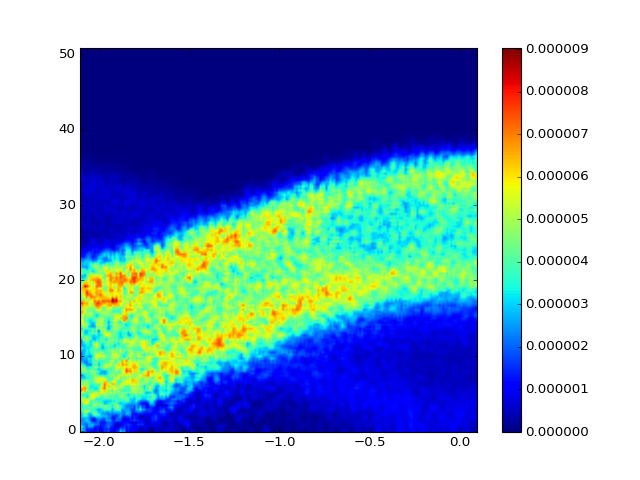

In [42]:
H.plot(hh.load("./slice_H00.h5"))

In [45]:
# Now try slicing along the Gamma -> M_pi path

In [46]:
%%file slice_HHH.yml

angles: -90,90.1,3.0
filename_pattern: work_%(angle)s/reduced_%(angle)s.nxs
lattice: 5., 5., 5., 90, 90, 90
orientation:
 u: 1, 0, 2
 v: 1,0,0
Eaxis:
 min: 0
 max: 51
 N: 181
Q_projections:
 U:
  proj: 1,1,1
  proj_name: H,H,H
  min: -2.1
  max: 0.1
  N: 201
 V:
  proj: 1,1,-2
  proj_name: L,L,-2L
  min: -.25
  max: .25
  N: 1
 W:
  proj: -2,1,1
  proj_name: -2H,H,H
  min: -0.25
  max: 0.25
  N: 1
output: slice_HHH.nxs

Writing slice_HHH.yml


In [47]:
! PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_HHH.yml > log.slice_HHH

In [49]:
!./scripts/reduce/slice2hist.py "slice_HHH.nxs" slice_HHH.h5

FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.80 seconds


plot z in (0, 1e-05)


<IPython.core.display.Javascript object>


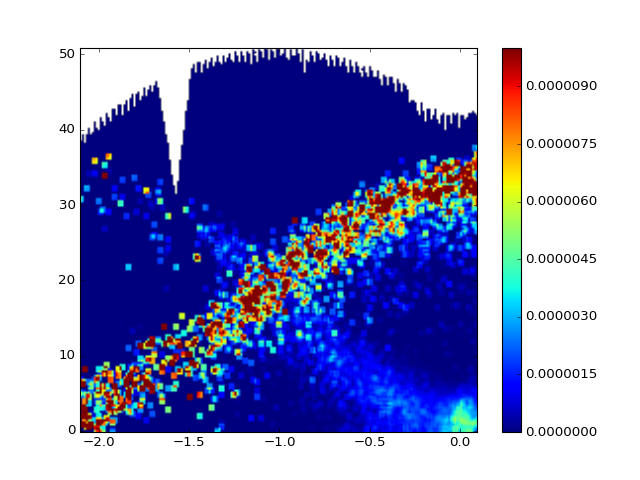

In [55]:
H.plot(hh.load("./slice_HHH.h5"), min=0, max=1e-5)

In [56]:
%%file slice_HHHpositive.yml

angles: -90,90.1,3.0
filename_pattern: work_%(angle)s/reduced_%(angle)s.nxs
lattice: 5., 5., 5., 90, 90, 90
orientation:
 u: 1, 0, 2
 v: 1,0,0
Eaxis:
 min: 0
 max: 51
 N: 181
Q_projections:
 U:
  proj: 1,1,1
  proj_name: H,H,H
  min: -0.1
  max: 2.1
  N: 201
 V:
  proj: 1,1,-2
  proj_name: L,L,-2L
  min: -.2
  max: .2
  N: 1
 W:
  proj: -2,1,1
  proj_name: -2H,H,H
  min: -0.2
  max: 0.2
  N: 1
output: slice_HHHpositive.nxs

Writing slice_HHHpositive.yml


In [57]:
! PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_HHHpositive.yml > log.slice_HHHpositive

In [58]:
!./scripts/reduce/slice2hist.py "slice_HHHpositive.nxs" slice_HHHpositive.h5

FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.88 seconds


plot z in (0, 1e-05)


<IPython.core.display.Javascript object>


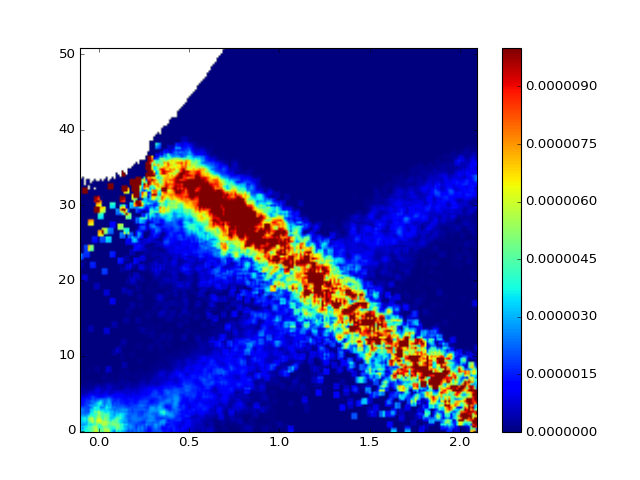

In [59]:
H.plot(hh.load("./slice_HHHpositive.h5"), min=0, max=1e-5)

In [113]:
%%file slice_GtoM_v2.yml

angles: -90,90.1,3.0
filename_pattern: work_%(angle)s/reduced_%(angle)s.nxs
lattice: 1., 1., 1., 90, 90, 90
orientation:
 u: 1, 0, 2
 v: 1,0,0
Eaxis:
 min: 0
 max: 50
 N: 100
Q_projections:
 U:
  proj: 1,1,0
  proj_name: H,H,0
  min: 0.0
  max: 1.0
  N: 140
 V:
  proj: 1,-1,0
  proj_name: H,-H,0
  min: -.2
  max: .2
  N: 1
 W:
  proj: 0,0,1
  proj_name: 0,0,L
  min: -0.2
  max: 0.2
  N: 1
output: slice_GtoM_v2.nxs

Writing slice_GtoM_v2.yml


In [115]:
! PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_GtoM_v2.yml > log.slice_GtoM_v2

/bin/sh: line 1: 13378 Killed                  PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_GtoM_v2.yml > log.slice_GtoM_v2


In [111]:
!./scripts/reduce/slice2hist.py "slice_GtoM.nxs" slice_GtoM.h5

FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 1.53 seconds


plot z in (0, 1.53743342019e-05)


<IPython.core.display.Javascript object>


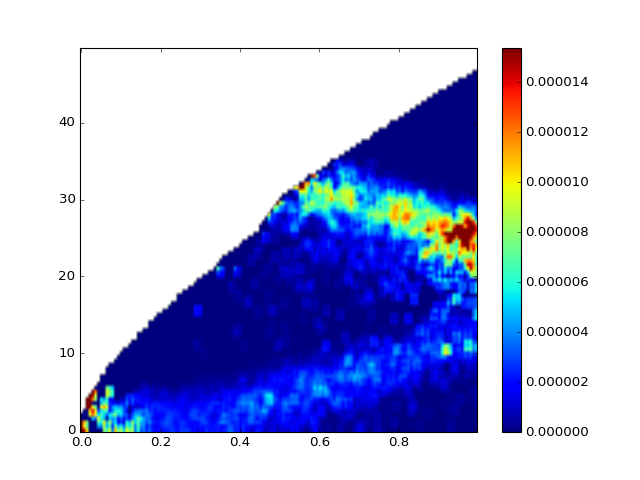

In [112]:
H.plot(hh.load("./slice_GtoM.h5"), min=0)

In [50]:
# Try for M --> X

In [105]:
%%file slice_MtoX_v7.yml

angles: -90,90.1,3.0
filename_pattern: work_%(angle)s/reduced_%(angle)s.nxs
lattice: 5., 5., 5., 90, 90, 90
orientation:
 u: 1, 0, 2
 v: 1,0,0
Eaxis:
 min: 0
 max: 50
 N: 100
Q_projections:
 U:
  proj: 0,1,0
  proj_name: 0,K,0
  min: 0.0
  max: 2.0
  N: 120
 V:
  proj: 1,0,0
  proj_name: H,0,0
  min: 0.8
  max: 1.2
  N: 1
 W:
  proj: 0,0,1
  proj_name: 0,0,L
  min: -0.2
  max: 0.2
  N: 1
output: slice_MtoX_v7.nxs


Writing slice_MtoX_v7.yml


In [106]:
! PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_MtoX_v7.yml > log.slice_MtoX_v7

In [107]:
!./scripts/reduce/slice2hist.py "slice_MtoX_v7.nxs" slice_MtoX_v7.h5

FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 1.36 seconds


plot z in (0, 2.35075409237e-05)


<IPython.core.display.Javascript object>


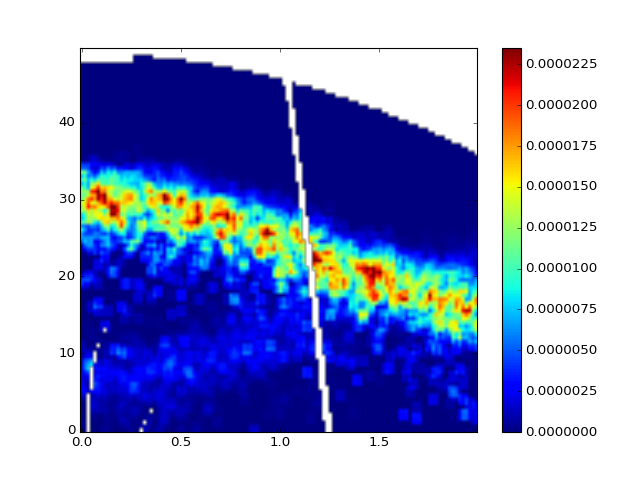

In [108]:
H.plot(hh.load("./slice_MtoX_v7.h5"), min=0)